In [5]:
#import section
import requests
from bs4 import BeautifulSoup
import pandas as pd
import math
from collections import Counter
import csv

In [6]:
headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 20_0_1; en-US; X11; Linux x86_64) AppleWebKit/537.75.14 (KHTML, like Gecko) Version/18.0.0 Safari/1500'}

In [7]:
data_list = []

In [8]:
#link to pages 
for pages in range(1,71):
  r = requests.get('https://www.lotto-8.com/listltobigbbk.asp?indexpage='+str(pages)+'&orderby=new', headers = headers)
  r.encoding = 'UTF-8' 
  soup = BeautifulSoup(r.text,'html.parser')
  lo_numbers = soup.select('[style*="border-bottom-style: dotted; border-bottom-color: #CCCCCC; font-size:36px"]')

  for td in lo_numbers:
    numbers = td.text
    data_list.append(numbers)

df = pd.DataFrame(data_list, columns=['Numbers'])



In [ ]:
all_numbers = []

for numbers in df['Numbers']:
    for number in numbers.split(','):
        all_numbers.append(number.strip())

print(all_numbers)

In [10]:
print(len(all_numbers))
print(type(all_numbers[0]))


14686
<class 'str'>


In [ ]:
for i in range(len(all_numbers)):
  all_numbers[i] = int(all_numbers[i])

print(type(all_numbers[0]))
print(all_numbers)
print(len(all_numbers))

In [ ]:
#
for i in range(1,50):
  print(i, ':',all_numbers.count(i) , ',', round(all_numbers.count(i)/len(all_numbers)*100,2), '%')
  

In [13]:
fields = ['lottery_number','count','percentage']
rows = []

for i in range(1,50):
  count = all_numbers.count(i)
  total = len(all_numbers)
  percentage = round(count/total*100,2)
  rows.append([i, count, percentage])
  


<function matplotlib.pyplot.show(close=None, block=None)>

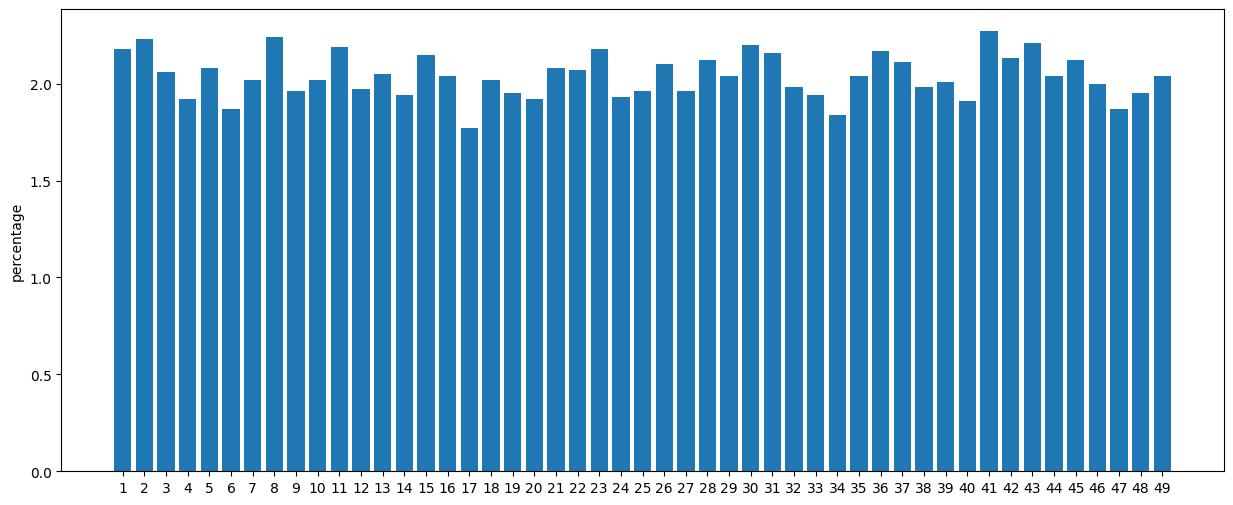

In [33]:
import matplotlib.pyplot as plt

numbers = [row[0] for row in rows]
percentages = [row[2] for row in rows]

plt.figure(figsize=(15, 6))


bars = plt.bar(numbers, percentages)

plt.xticks(numbers)
plt.ylabel(fields[2])

plt.show



In [50]:
#find top 7 numbers
df = pd.DataFrame(rows, columns=fields)

df_sorted = df.sort_values(by='percentage', ascending=False)
top_7 = df_sorted.head(7)

print(top_7)

    lottery_number  count  percentage
40              41    333        2.27
7                8    329        2.24
1                2    327        2.23
42              43    325        2.21
29              30    323        2.20
10              11    322        2.19
0                1    320        2.18


<function matplotlib.pyplot.show(close=None, block=None)>

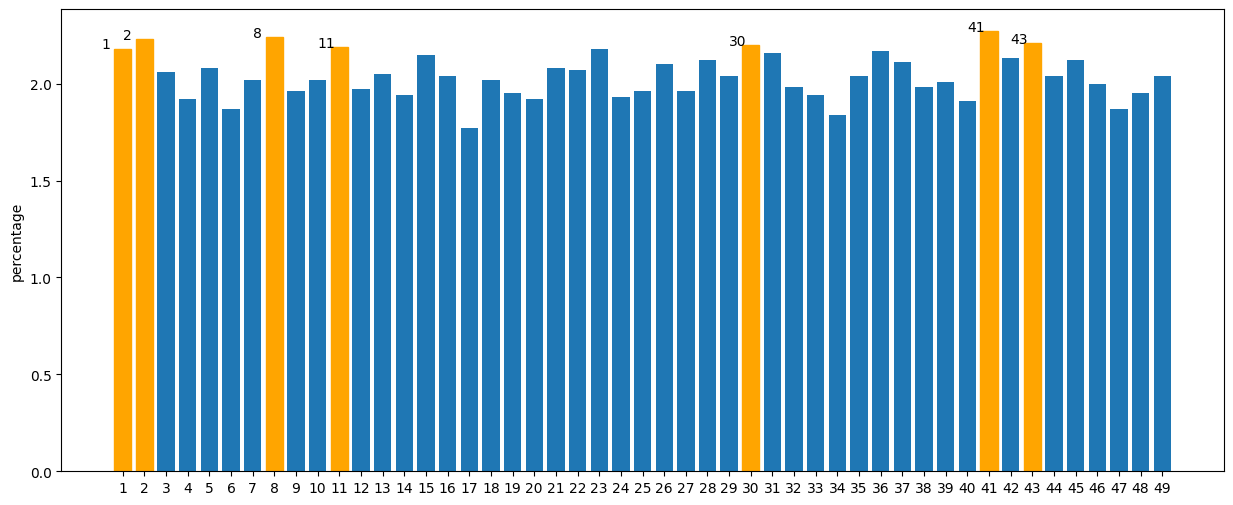

In [57]:
plt.figure(figsize=(15, 6))


bars = plt.bar(numbers, percentages)

plt.xticks(numbers)
plt.ylabel(fields[2])

for index in top_7.index:
    bars[index].set_color('orange')
    plt.text(index, percentages[index], str(numbers[index]))

plt.show